# (German Federal Election 2017)
## by (Jean-Pierre Distler)

## Preliminary Wrangling

The dataset contains the results of the german federal election from 2017. The dataset contains 3 files:
1. An overall overview of the valid and invalid first and second votes for all electoral districts and the federal state they belong to.
2. The second file contains the votes for each party in all electoral districts.
3. A shape file containing all electoral districts. This will be used to generate some map plots.

You can find an explanation of the german election system here https://en.wikipedia.org/wiki/Electoral_system_of_Germany

The dataset is in a good shape and doesn't need much cleaning. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpereader

%matplotlib inline

In [2]:
# This file contains the overall results per district
df = pd.read_csv('2017_german_election_overall.csv')
# This file contains the result per party and district
df2 = pd.read_csv('2017_german_election_party.csv')
# This file contains shapes for all districts
geometries = shpereader.Reader('Geometrie_Wahlkreise_19DBT_VG250_geo.shp') 
shapes = list(geometries.geometries())

In [3]:
areas = geometries.records()
areas_as_array = []
for area in areas:
    areas_as_array.append(area.attributes)

In [4]:
party_mapping = {'CDU' : 'Christlich.Demokratische.Union.Deutschlands',
                 'SPD' : 'Sozialdemokratische.Partei.Deutschlands',
                 'Linke' : 'DIE.LINKE',
                 'Grüne' : 'BÜNDNIS.90.DIE.GRÜNEN',
                 'CSU' : 'Christlich.Soziale.Union.in.Bayern.e.V.',
                 'UNION' : 'UNION',
                 'FDP' : 'Freie.Demokratische.Partei',
                 'AFD' : 'Alternative.für.Deutschland',
                 'Piraten' : 'Piratenpartei.Deutschland',
                 'NPD' : 'Nationaldemokratische.Partei.Deutschlands'}

In [31]:
def turnout_for_party(party, area):
    temp = df2.query('area_id == @area')
    total_votes = df.query('area_id == @area')['valid_second_votes'].iloc[-1]
    temp = temp.query('party == @party')
    party_votes = sum(temp['votes_second_vote'])
    
    #return  min((party_votes / total_votes) * 2, 1)
    return (party_votes / total_votes)

In [52]:
def draw_turnout_for_party(party, color):
    fig = plt.figure(figsize=(10, 15))
    ax = plt.axes(projection=ccrs.PlateCarree())

    plt.title('Germany')
    ax.coastlines(resolution='10m')

    i = 0
    for shape in shapes:
        alpha = turnout_for_party(party, i + 1)
        alpha = min(alpha * 2, 1)

        ax.add_geometries([shape], ccrs.PlateCarree(), edgecolor='black', facecolor=color, alpha=alpha)
        i += 1
    ax.set_extent([5,16,47,56], ccrs.PlateCarree())

    plt.show();
    

In [20]:
def turnout_for_state(state):
    temp = df.query('state == @state')
    registered_voters = temp.registered_voters.sum()
    total_votes = temp.total_votes.sum()
    return total_votes / registered_voters * 100

In [5]:
df2.replace('Christlich.Demokratische.Union.Deutschlands', 'UNION', inplace=True)
df2.replace('Christlich.Soziale.Union.in.Bayern.e.V.', 'UNION', inplace=True)




## Voter Turnout

In [21]:
registered_voters = df.registered_voters.sum()
total_votes = df.total_votes.sum()
turnout = total_votes / registered_voters
turnout

0.7616278248703793

The total turnout is about 76%.
### Turnout per federal state

In [23]:
states = ['Nordrhein-Westfalen', 'Bayern', 'Baden-Württemberg', 'Niedersachsen', 'Hessen', 'Sachsen', 'Rheinland-Pfalz', 'Berlin', 'Schleswig-Holstein', 'Brandenburg', 'Sachsen-Anhalt', 'Thüringen', 'Hamburg', 'Mecklenburg-Vorpommern', 'Saarland', 'Bremen']

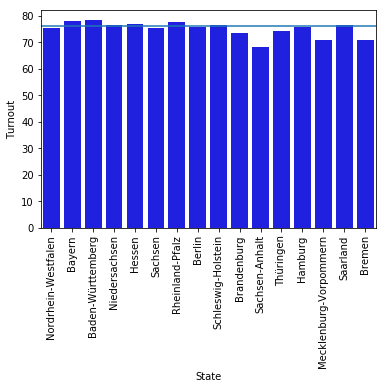

In [24]:
turnouts = []
for state in states:
    turnouts.append(turnout_for_state(state))
    
temp_df = pd.DataFrame({'State' : states, 'Turnout' : turnouts})
sns.barplot(x='State', y='Turnout', data=temp_df, color='blue');
plt.xticks(rotation=90);
plt.axhline(turnout * 100);


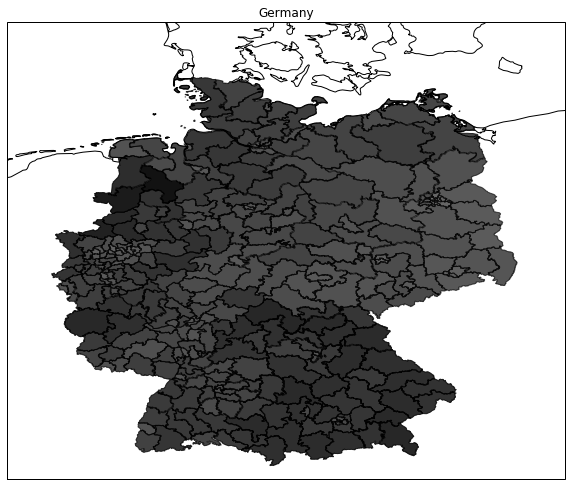

In [51]:
draw_turnout_for_party(party_mapping['UNION'], 'black')

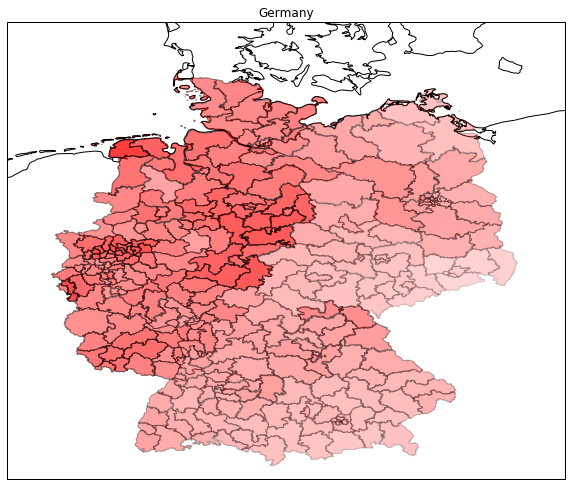

In [54]:
draw_turnout_for_party(party_mapping['SPD'], 'red')

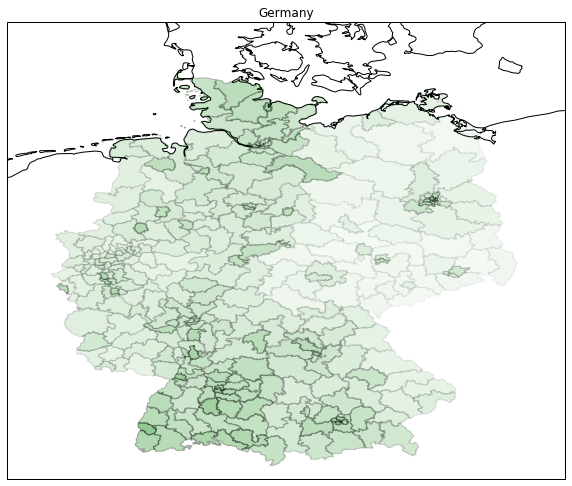

In [55]:
draw_turnout_for_party(party_mapping['Grüne'], 'green')

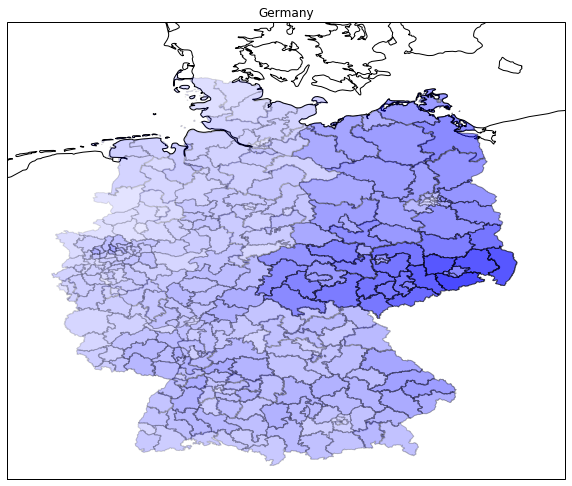

In [57]:
draw_turnout_for_party(party_mapping['AFD'], 'blue')

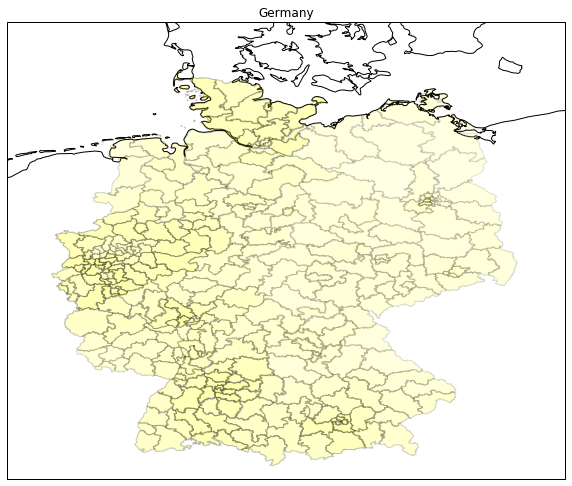

In [58]:
draw_turnout_for_party(party_mapping['FDP'], 'yellow')

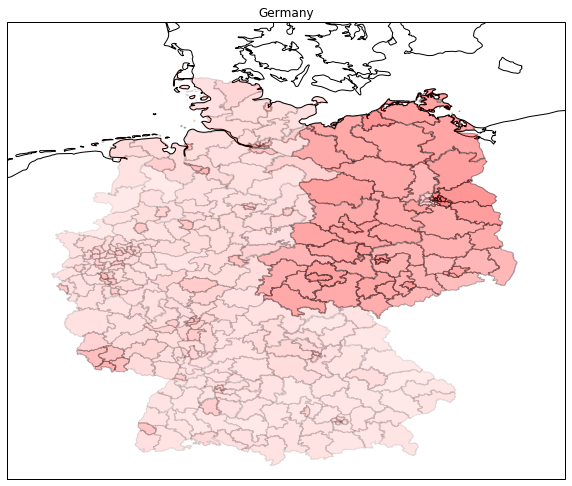

In [56]:
draw_turnout_for_party(party_mapping['Linke'], 'red')